# Eksperimen - Jupyter

### Oleh:
### - Faza Thirafi (13514033)
### - Ade Surya R (13514049)
### - Drestanto M Dyasputro (13514099)

## Source Code Utama

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

class eksperimen(object):
    def __init__(self, dataset=None, classifier=None, X=None, y=None, dataset_split=None, feature_names=None, target_names=None):
        self.dataset = dataset
        self.classifier = classifier
        self.X = X
        self.y = y
        self.dataset_split = dataset_split
        self.feature_names = feature_names
        self.target_names = target_names

    def get_std_dataset(self):
        self.dataset = load_iris()
        self.X = self.dataset['data']
        self.y = self.dataset['target']
#         print(self.X)

    def printmatrix_accuracy_percentage(self):
        predict = self.classifier.predict(self.dataset_split['X_test'])
    
        # accuracy
        print(accuracy_score(self.dataset_split['y_test'],predict))

        # metrics confusion
        print(confusion_matrix(self.dataset_split['y_test'],predict))
    
    def build_clf_percentage(self, clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(10, 2), random_state=1)
        # training dengan 90% data   
        self.classifier.fit(self.dataset_split['X_train'],self.dataset_split['y_train'])

    def build_clf_full(self,clf_name):
        if (clf_name == 'dtl'):
            self.classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
        elif (clf_name == 'ann'):
            self.classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                            hidden_layer_sizes=(10, 5), random_state=1)
        # training dengan full data   
        self.classifier.fit(self.X,self.y)
        
    def saveModel(self,namaFile):
        joblib.dump(self.classifier,namaFile)
    
    def loadModel(self,namaFile):
        self.classifier= joblib.load(namaFile)
    
    def split_dataset(self):
        # X adalah data setiap fitur, y adalah target 
        # split menjadi 90% training 10% testing
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.1 ,train_size = 0.9)
        self.dataset_split = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }

    def get_dataset(self, filename, class_index):
        le = preprocessing.LabelEncoder()
        raw_data = pd.read_csv(filename, header=None)
        array_nama_atribut = raw_data.columns
        
        feature_names = []
        index = 0
        for name in array_nama_atribut:
            if (index != class_index):
                feature_names.append(name)
            index += 1
        self.feature_names = feature_names
   
        le.fit(raw_data[raw_data.columns[class_index]])
        self.target_names = le.classes_
        
        for key in array_nama_atribut:
            list_value = raw_data[key]
            value = []
            for i in list_value:
                value.append(i)
            le.fit(value)
            # save le
            val = le.transform(value)
            raw_data[key] = val
        
        self.dataset = raw_data
        
        y = [] # target
        for target in raw_data[raw_data.columns[class_index]]: # play is the name of the class index
            y.append(target)
        self.y = y
        X = [] # domain
        i = 0
        jumlah_data = len(raw_data)
        while (i<jumlah_data):
            elem_x = []
            test = 0
            for elem in raw_data.columns:
                if (test != class_index):
                    elem_x.append(raw_data.loc[i, elem])
                test += 1
            X.append(elem_x)
            i += 1
        self.X = X
    
    def get10FoldCrossValidation(self):
        score = cross_val_score(self.classifier, self.X, self.y, cv=10)
        print(score.mean())

    def classifyNewIns(self,ins):
        predict = self.classifier.predict(ins)
        print(predict)
    
def plotting():
        
    iris = sns.load_dataset('iris')
    my_data_frame = pd.DataFrame(iris)
        
    sns.set(style="ticks", color_codes=True) # change style
    g = sns.pairplot(iris, hue="species")
    

exp = eksperimen()


### A. (1) Membaca Dataset Play Tennis (.csv Format)


In [94]:
exp.get_dataset('CencusIncome.data.csv', 14);
# print('Dataset\'s data')
# print(exp.X);
# print()
# print('Dataset\'s target')
# print(exp.y);


### A. (2) Membaca Dataset Iris


### B. (1) Full-Training - DTL


In [95]:
exp.build_clf_full('dtl')

from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(exp.classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(exp.classifier, out_file=None, 
                         feature_names=exp.feature_names,  
                         class_names=exp.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
# graph = graphviz.Source(dot_data)  


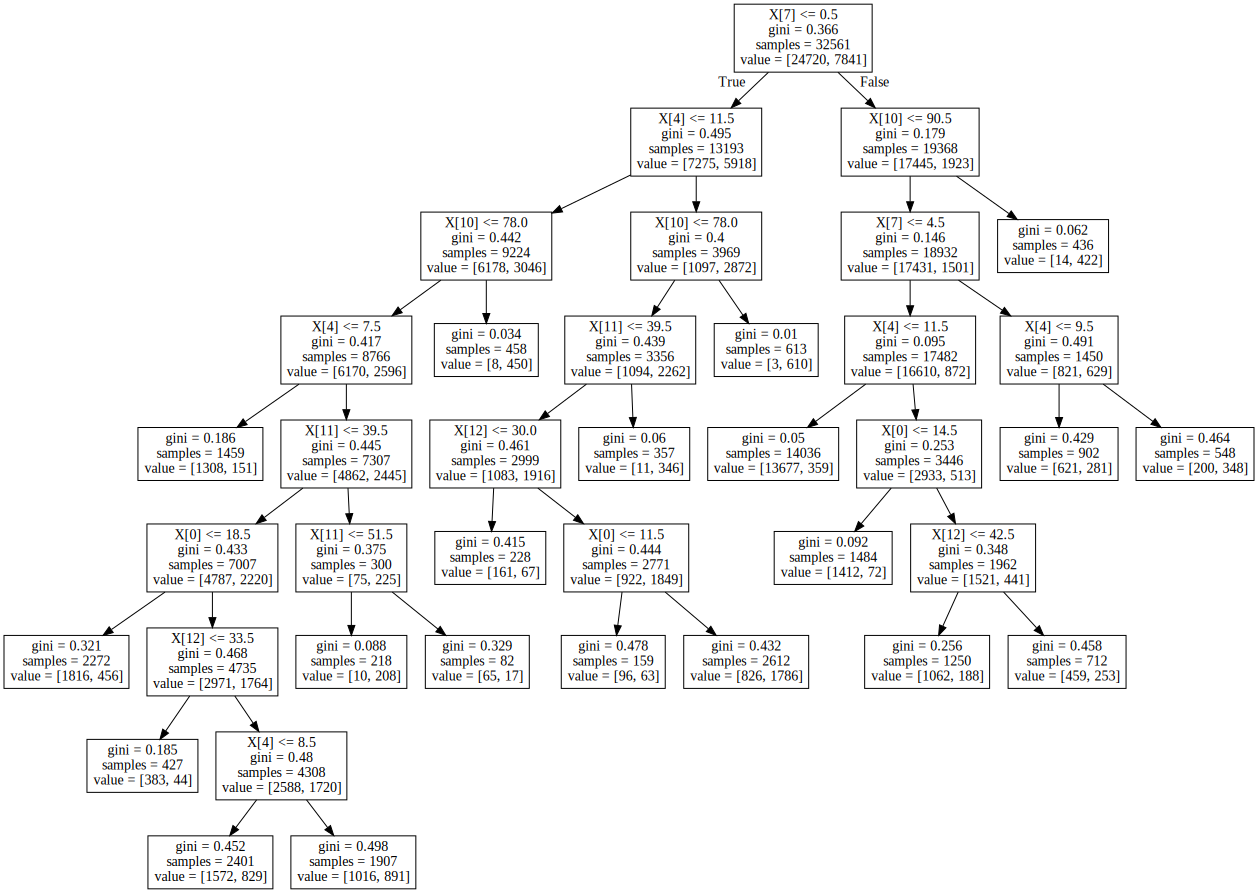

In [96]:
graph

### B. (2) Full-Training - ANN


In [97]:
exp.build_clf_full('ann')
print(exp.classifier.coefs_)

[array([[-0.082978  ,  0.22032449, -0.49988563, -0.19766743, -0.35324411,
        -0.40766141, -0.31373979, -0.15443927, -0.10323253,  0.03881673],
       [-0.08080549,  0.1852195 , -0.29554775,  0.37811744, -0.47261241,
         0.17046751, -0.0826952 ,  0.05868983, -0.35961306, -0.30189851],
       [ 0.30074457,  0.46826158, -0.18657582,  0.19232262,  0.37638915,
         0.39460666, -0.41495579, -0.46094522, -0.33016958,  0.3781425 ],
       [-0.40165317, -0.07889237,  0.45788953,  0.03316528,  0.19187711,
        -0.18448437,  0.18650093,  0.33462567, -0.48171172,  0.25014431],
       [ 0.48886109,  0.24816565, -0.21955601,  0.28927933, -0.39677399,
        -0.05210647,  0.4085955 , -0.20638585, -0.21222466, -0.36997143],
       [-0.48063304,  0.17883553, -0.28837188, -0.23445334, -0.00842684,
        -0.44663745,  0.07411761, -0.35327143,  0.08930554,  0.19975836],
       [-0.39766557, -0.08594401,  0.19440016, -0.08582073, -0.45004654,
         0.03589641,  0.16379465,  0.0148891

### C. (1) Split Training-Testing - DTL


In [98]:
exp.split_dataset()
exp.build_clf_percentage('dtl')
exp.printmatrix_accuracy_percentage()

0.861836045441
[[2392  117]
 [ 333  415]]


### C. (2) Split Training-Testing - ANN


In [99]:
exp.build_clf_percentage('ann')
exp.printmatrix_accuracy_percentage()

0.770340804421
[[2509    0]
 [ 748    0]]


### D. (1) 10-fold Cross Validation - DTL


In [100]:
exp.build_clf_full('dtl')
exp.get10FoldCrossValidation()

0.852185464835


### D. (2) 10-fold Cross Validation - ANN

In [101]:
exp.build_clf_full('ann')
exp.get10FoldCrossValidation()

0.240809551003


### E. Save Model


In [102]:
exp.saveModel('model.txt')

### F. Load Model


In [103]:
exp.loadModel('model.txt')

### G. Membuat Instance Baru


In [104]:
new_inst = [ 5.9,  3. ,  5.1,  1.8]

### H. (1) Klasifikasi Instance (G) - DTL


### H. (2) Klasifikasi Instance (G) - ANN

### I. Analisis Fitur

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

iris = sns.load_dataset('iris')
# print(iris)
iris = exp.dataset
# print(iris)
sns.set(style="ticks", color_codes=True) # change style
g = sns.pairplot(iris, hue=14)